In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [4]:
iris = sns.load_dataset('iris')

In [10]:
iris.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
87,6.3,2.3,4.4,1.3,versicolor
66,5.6,3.0,4.5,1.5,versicolor
127,6.1,3.0,4.9,1.8,virginica
100,6.3,3.3,6.0,2.5,virginica
49,5.0,3.3,1.4,0.2,setosa


In [5]:
scaler = StandardScaler()
scaled = scaler.fit_transform(
    iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
    )

covariance_matrix = np.cov(scaled.T)
covariance_matrix

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

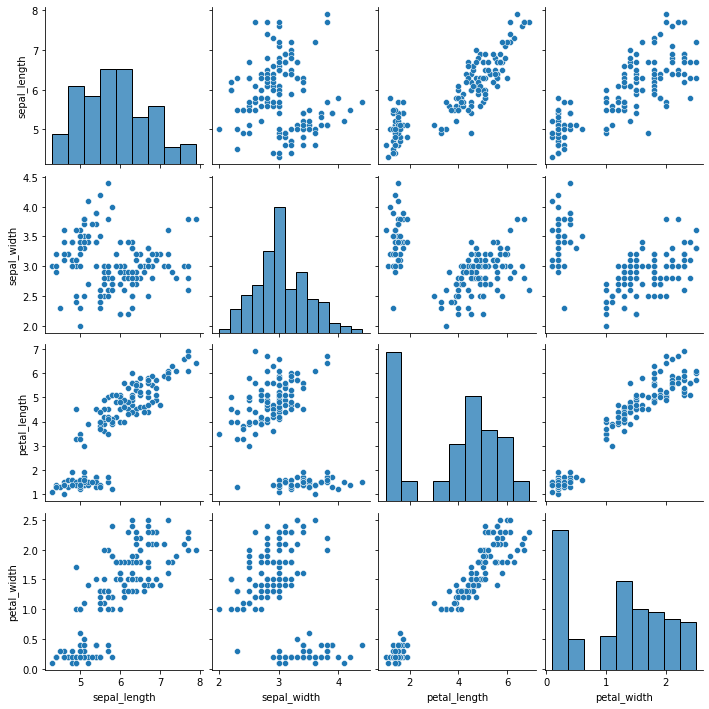

In [7]:
sns.pairplot(iris)
plt.show()

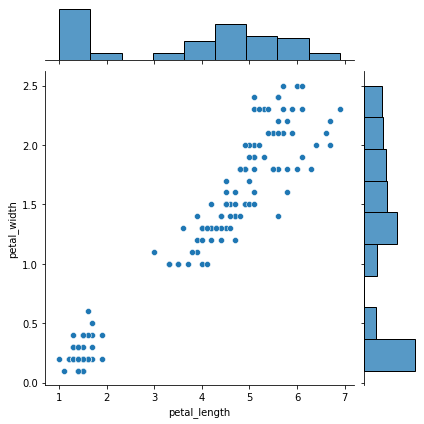

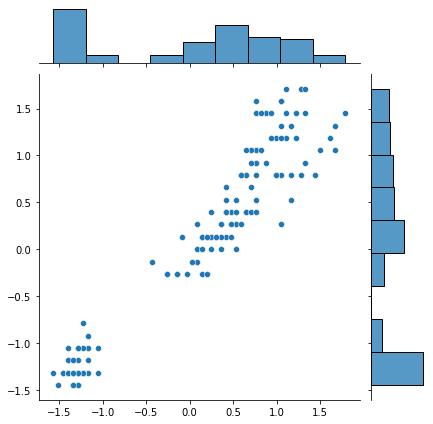

In [8]:
sns.jointplot(x= iris['petal_length'], y=iris['petal_width'])
sns.jointplot(x = scaled[:, 2], y = scaled[:,3])
plt.show()

Descomposicion en vectores y valores propios: https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html

In [11]:
#calcular la descomposicion de vectores en valores propios
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

In [12]:
eigen_values

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

In [13]:
eigen_vectors

array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]])

In [17]:
#porcentaje que representa
variance_explained = []
for i in eigen_values:
    variance_explained.append((i/sum(eigen_values))*100)

print(variance_explained)

[72.96244541329987, 22.850761786701774, 3.668921889282877, 0.51787091071548]


PCA con scikit : https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [18]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(scaled)

PCA(n_components=2)

In [19]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

In [20]:
#reduccion de los datos
reduced_scaled = pca.transform(scaled)

In [26]:
iris['pca_1'] = reduced_scaled[:,0]
iris['pca_2'] = reduced_scaled[:,1]
iris

,sepal_length,sepal_width,petal_length,petal_width,species,pca_1,pca_2
0,5.1,3.5,1.4,0.2,setosa,-2.264703,0.480027
1,4.9,3.0,1.4,0.2,setosa,-2.080961,-0.674134
2,4.7,3.2,1.3,0.2,setosa,-2.364229,-0.341908
3,4.6,3.1,1.5,0.2,setosa,-2.299384,-0.597395
4,5.0,3.6,1.4,0.2,setosa,-2.389842,0.646835
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,1.870503,0.386966
146,6.3,2.5,5.0,1.9,virginica,1.564580,-0.896687
147,6.5,3.0,5.2,2.0,virginica,1.521170,0.269069
148,6.2,3.4,5.4,2.3,virginica,1.372788,1.011254


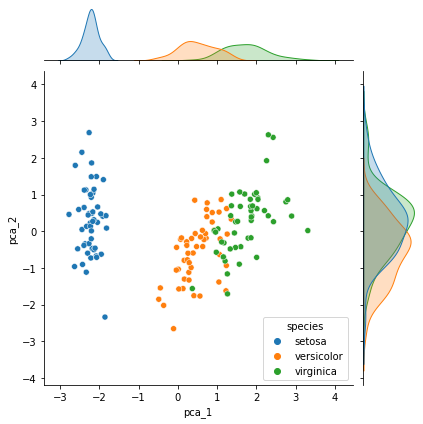

In [27]:
sns.jointplot(data= iris, x='pca_1', y='pca_2', hue = 'species')
plt.show()